In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#Loading DataSets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [4]:
print("Customers Dataset Info:")
print(customers.info())
print("\nProducts Dataset Info:")
print(products.info())
print("\nTransactions Dataset Info:")
print(transactions.info())

Customers Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Products Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB
None

Transactions Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   C

In [5]:
# Merge datasets for combined analysis
merged_data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

In [6]:
# Checking Missing Values
print("\nMissing Values in Customers:\n", customers.isnull().sum())
print("\nMissing Values in Products:\n", products.isnull().sum())
print("\nMissing Values in Transactions:\n", transactions.isnull().sum())


Missing Values in Customers:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing Values in Products:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing Values in Transactions:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [7]:
print("\nMerged Data Description:\n", merged_data.describe())



Merged Data Description:
           Quantity   TotalValue     Price_x     Price_y
count  1000.000000  1000.000000  1000.00000  1000.00000
mean      2.537000   689.995560   272.55407   272.55407
std       1.117981   493.144478   140.73639   140.73639
min       1.000000    16.080000    16.08000    16.08000
25%       2.000000   295.295000   147.95000   147.95000
50%       3.000000   588.880000   299.93000   299.93000
75%       4.000000  1011.660000   404.40000   404.40000
max       4.000000  1991.040000   497.76000   497.76000


/var/folders/3r/m6lbvgj53x70dt6mj9dkfhdh0000gp/T/ipykernel_59045/3595711519.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers, x="Region", order=customers["Region"].value_counts().index, palette="cool")


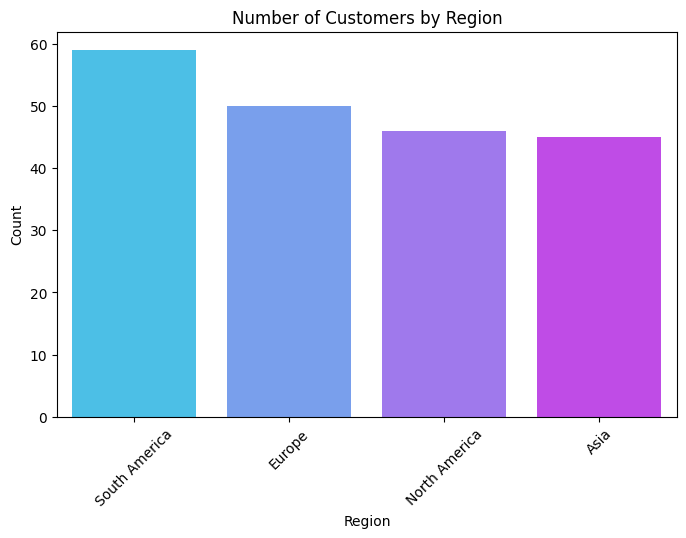

In [8]:
#Distribution of Customers by Region
plt.figure(figsize=(8, 5))
sns.countplot(data=customers, x="Region", order=customers["Region"].value_counts().index, palette="cool")
plt.title("Number of Customers by Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

/var/folders/3r/m6lbvgj53x70dt6mj9dkfhdh0000gp/T/ipykernel_59045/2979646057.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette="viridis")


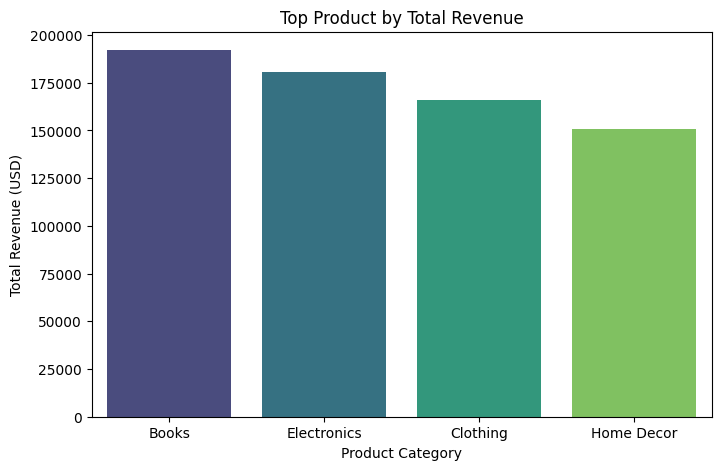

In [9]:
# Top Product  by Total Revenue
top_categories = (
    merged_data.groupby("Category")["TotalValue"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_categories.index, y=top_categories.values, palette="viridis")
plt.title("Top Product by Total Revenue")
plt.xlabel("Product Category")
plt.ylabel("Total Revenue (USD)")
plt.show()


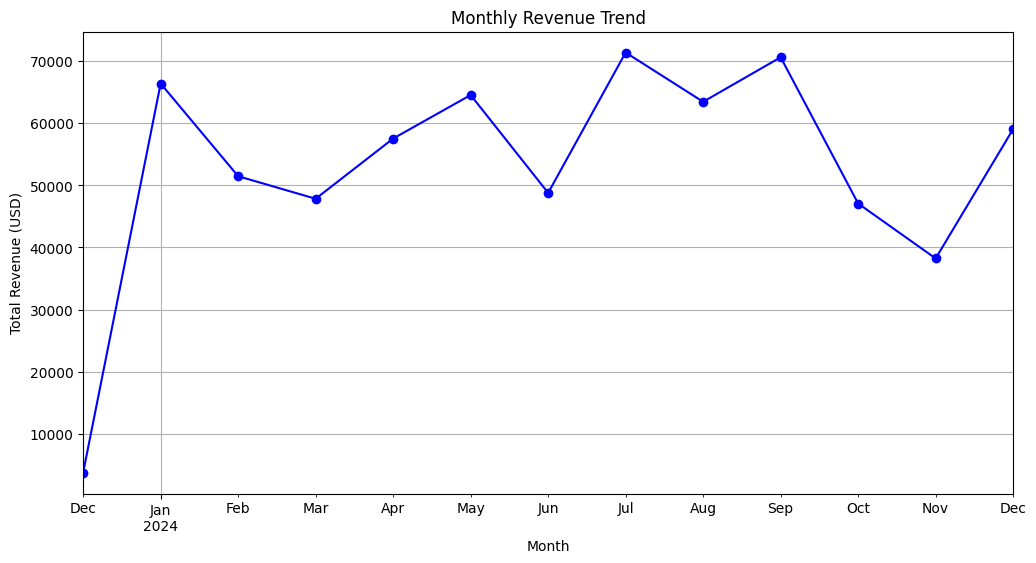

In [10]:
#  Monthly Revenue Trend
merged_data["TransactionDate"] = pd.to_datetime(merged_data["TransactionDate"])
monthly_revenue = merged_data.groupby(merged_data["TransactionDate"].dt.to_period("M"))[
    "TotalValue"
].sum()

plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind="line", marker="o", color="blue")
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue (USD)")
plt.grid()
plt.show()




/var/folders/3r/m6lbvgj53x70dt6mj9dkfhdh0000gp/T/ipykernel_59045/25776740.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_customers.index, x=top_customers.values, palette="coolwarm")


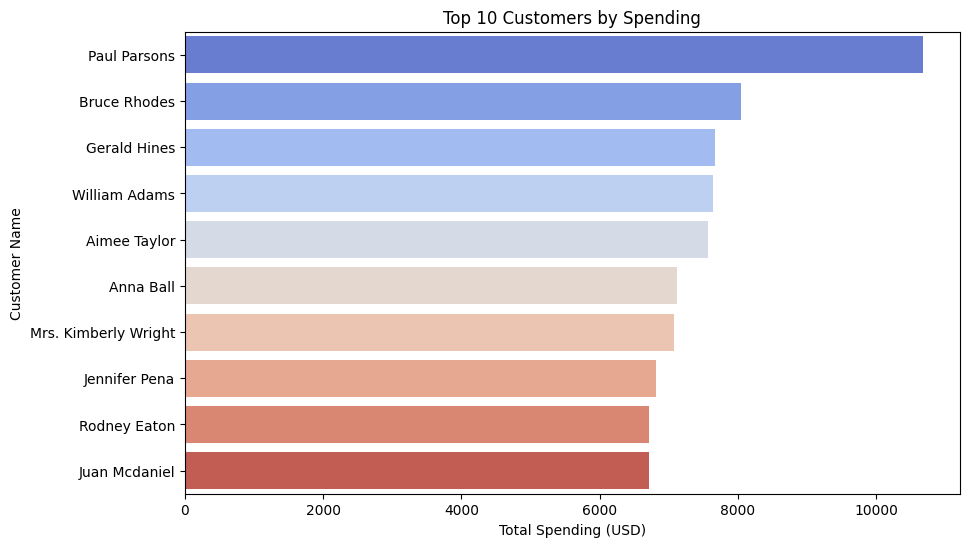

In [11]:
# Top 10 Customers by Spending
top_customers = (
    merged_data.groupby("CustomerName")["TotalValue"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
plt.figure(figsize=(10, 6))
sns.barplot(y=top_customers.index, x=top_customers.values, palette="coolwarm")
plt.title("Top 10 Customers by Spending")
plt.xlabel("Total Spending (USD)")
plt.ylabel("Customer Name")
plt.show()

In [12]:
print(merged_data.columns)


Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'CustomerName', 'Region',
       'SignupDate', 'ProductName', 'Category', 'Price_y'],
      dtype='object')


/var/folders/3r/m6lbvgj53x70dt6mj9dkfhdh0000gp/T/ipykernel_59045/4258230052.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


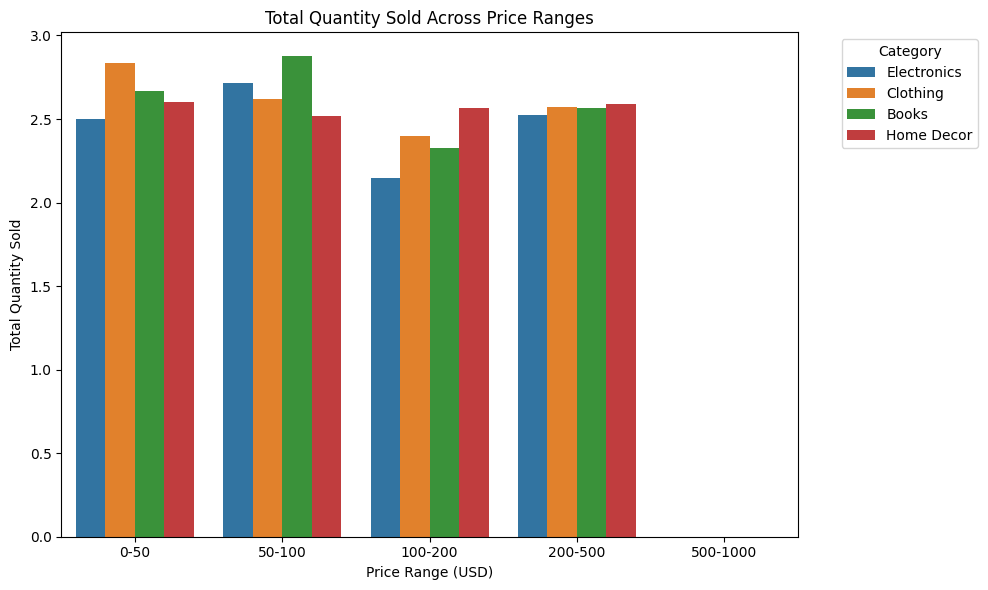

In [13]:
# Bar plot: Total Quantity vs. Price Range
merged_data['PriceRange'] = pd.cut(merged_data['Price_x'], bins=[0, 50, 100, 200, 500, 1000], 
                                   labels=['0-50', '50-100', '100-200', '200-500', '500-1000'])

plt.figure(figsize=(10, 6))
sns.barplot(
    data=merged_data, 
    x="PriceRange", 
    y="Quantity", 
    hue="Category", 
    ci=None, 
    palette="tab10"
)
plt.title("Total Quantity Sold Across Price Ranges")
plt.xlabel("Price Range (USD)")
plt.ylabel("Total Quantity Sold")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()
